In [1]:
import matplotlib.pyplot as plt

def plot_loss_curves(filepath, losses_to_plot, max_epoch=None):
    # Read data from file
    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Parse the data
    epochs = []
    losses = { 'loss_S': [], 'loss_T': [], 'loss_e': [], 'loss_V': [] }

    for line in lines:
        data = line.strip().split(',')
        epoch = int(data[0])
        if max_epoch is not None and epoch > max_epoch:
            break
        epochs.append(epoch)
        losses['loss_S'].append(float(data[1]))
        losses['loss_T'].append(float(data[2]))
        losses['loss_e'].append(float(data[3]))
        losses['loss_V'].append(float(data[4]))

    # Plotting
    plt.figure(figsize=(10, 5))
    for loss_name in losses_to_plot:
        if loss_name in losses:
            plt.plot(epochs, losses[loss_name], label=loss_name)
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.grid(True)
    plt.show()




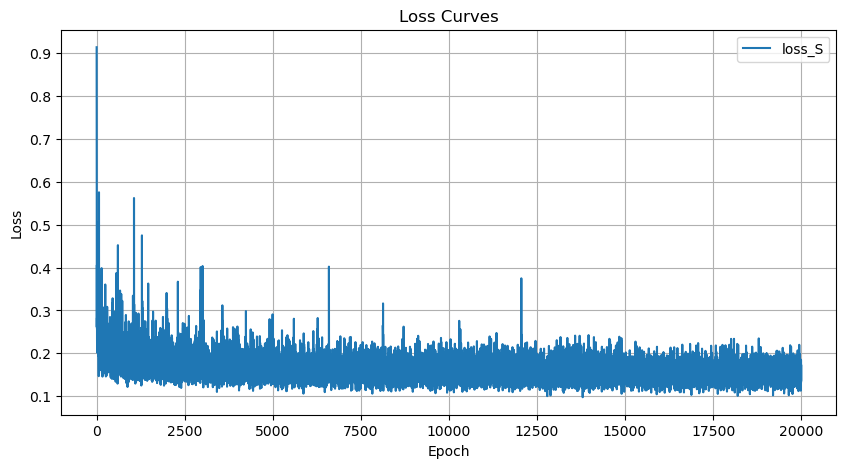

In [8]:
# Example usage
filepath = '/mnt/Disk/zx/HADAR/test3_integral/49-channels/loss_train.txt'  # Update the path to your file
losses_to_plot = ['loss_S', ]  # Specify the losses you want to see
plot_loss_curves(filepath, losses_to_plot, max_epoch=20000)  # Specify the maximum epoch if needed

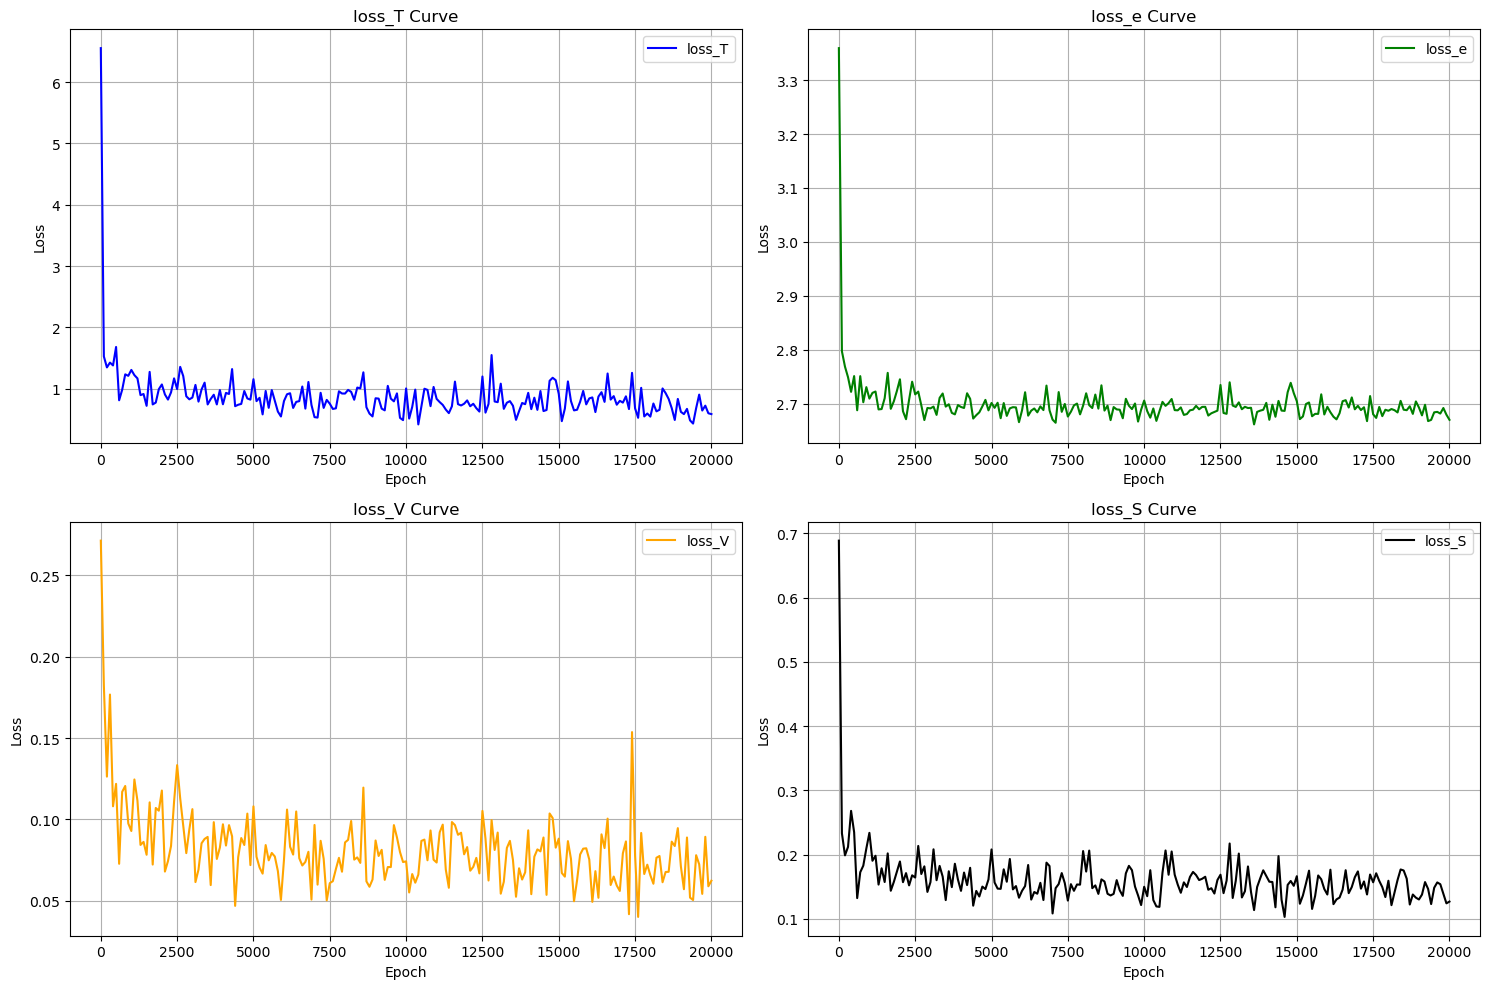

In [8]:
import matplotlib.pyplot as plt

def plot_loss_curves(filepath, losses_to_plot, max_epoch=None, sample_rate=100):
    # Read data from file
    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Parse the data
    epochs = []
    losses = { 'loss_S': [], 'loss_T': [], 'loss_e': [], 'loss_V': [] }

    # Implement sampling
    for index, line in enumerate(lines):
        if index % sample_rate != 0:  # Skip points based on sample rate
            continue
        data = line.strip().split(',')
        epoch = int(data[0])
        if max_epoch is not None and epoch > max_epoch:
            break
        epochs.append(epoch)
        losses['loss_S'].append(float(data[1]))
        losses['loss_T'].append(float(data[2]))
        losses['loss_e'].append(float(data[3]))
        losses['loss_V'].append(float(data[4]))

    # Define colors for the plots
    colors = ['blue', 'green', 'orange', 'black']  # Add or change colors as desired
    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust subplot layout to 2x2
    axs = axs.flatten()  # Flatten the array to make indexing easier

    # Plot each selected loss
    for i, loss_name in enumerate(losses_to_plot):
        if loss_name in losses:
            axs[i].plot(epochs, losses[loss_name], label=loss_name, color=colors[i])
            axs[i].set_title(f'{loss_name} Curve')
            axs[i].set_xlabel('Epoch')
            axs[i].set_ylabel('Loss')
            axs[i].legend()
            axs[i].grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example usage
filepath = '/mnt/Disk/zx/HADAR/test6_loss/supervised_train_all/loss_train.txt'
losses_to_plot = ['loss_T', 'loss_e', 'loss_V', 'loss_S']
plot_loss_curves(filepath, losses_to_plot, max_epoch=20000, sample_rate=100)


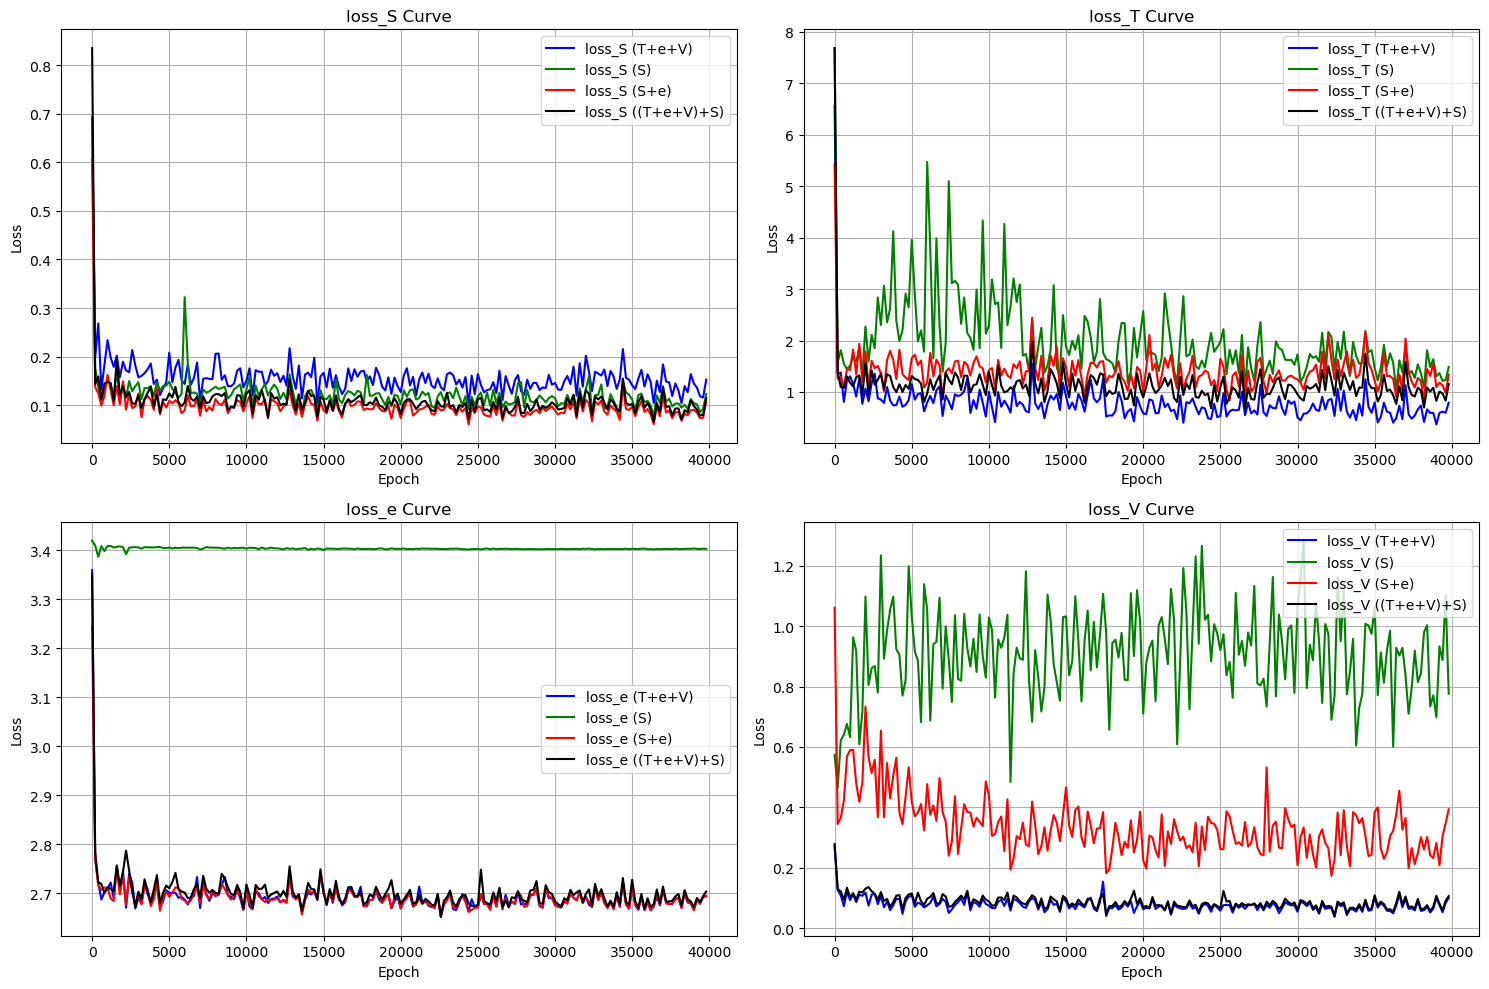

In [13]:
import matplotlib.pyplot as plt

def plot_loss_curves(filepaths, losses_to_plot, max_epoch=None, sample_rate=100):
    # Define colors for the plots - each file will have a consistent color across plots
    colors = ['blue', 'green', 'red', 'black']
    
    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()
    
    for file_idx, filepath in enumerate(filepaths):
        with open(filepath, 'r') as file:
            lines = file.readlines()

        # Parse the data
        epochs = []
        losses = {'loss_S': [], 'loss_T': [], 'loss_e': [], 'loss_V': []}
        
        for index, line in enumerate(lines):
            if index % sample_rate != 0:  # Skip points based on sample rate
                continue
            data = line.strip().split(',')
            epoch = int(data[0])
            if max_epoch is not None and epoch > max_epoch:
                break
            epochs.append(epoch)
            losses['loss_S'].append(float(data[1]))
            losses['loss_T'].append(float(data[2]))
            losses['loss_e'].append(float(data[3]))
            losses['loss_V'].append(float(data[4]))

        name = ['T+e+V', 'S', 'S+e', '(T+e+V)+S']

        # Plot each selected loss
        for i, loss_name in enumerate(losses_to_plot):
            if loss_name in losses:
                axs[i].plot(epochs, losses[loss_name], label=f'{loss_name} ({name[file_idx]})', color=colors[file_idx])
                axs[i].set_title(f'{loss_name} Curve')
                axs[i].set_xlabel('Epoch')
                axs[i].set_ylabel('Loss')
                axs[i].legend()
                axs[i].grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example usage
filepaths = [
    '/mnt/Disk/zx/HADAR/test6_loss/supervised_train_all/loss_train.txt',
    '/mnt/Disk/zx/HADAR/test6_loss/only_S_loss/loss_train.txt',
    '/mnt/Disk/zx/HADAR/test6_loss/unsupervised_loss/loss_train.txt',
    '/mnt/Disk/zx/HADAR/test6_loss/hybrid_loss/loss_train.txt'
]
losses_to_plot = ['loss_S', 'loss_T', 'loss_e', 'loss_V']
plot_loss_curves(filepaths, losses_to_plot, max_epoch=40000, sample_rate=200)
